<a href="https://colab.research.google.com/github/compi1234/spchlab/blob/main/lab04_bayes/StandardNormalDistribution.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Google Colab" title="Open in Google Colab"></a> 
# Standard Normal Distribution

The z-transformation 
$$
z = \frac{x-\mu}{\sigma}
$$

measures the number of standard deviations that a random variable deviates from the mean.  The z-transformation may be used to map any normal (Gaussian) distribution to the *standard normal* distribution with probability density function (pdf):
$$
p(z) = \frac{1}{\sqrt{2\pi}} exp \left( -\frac{1}{2} z^2 \right)
$$

The figures below show both  pdf (above) and the cumulative density function (cdf) , i.e. the probability mass under the curve to the left of a given point.


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


# define pdf and cdf of normal distribution, and cdfbin (surface under pdf between x1 and x2)
def pdf(x):
    return ( 1./np.sqrt(2*np.pi) * np.exp( -0.5*x*x ) )

def cdf(x):
    return ( 0.5*(1+math.erf(x/math.sqrt(2))) )

def cdfbin(x1,x2):
    return ( cdf(x2) - cdf(1) )


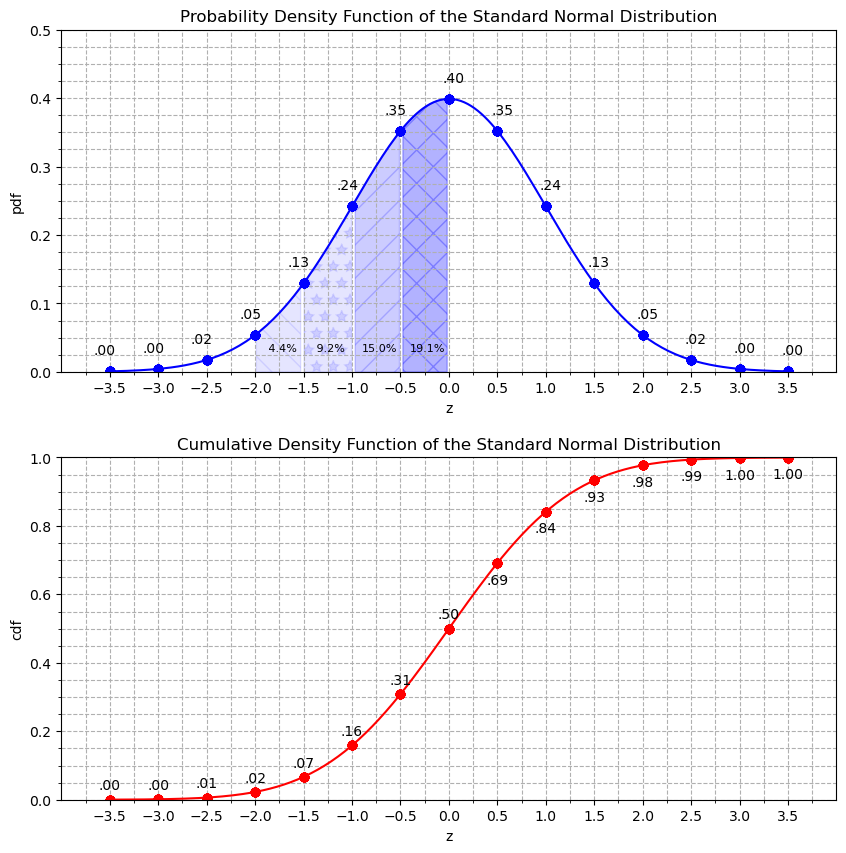

In [13]:
# 
x1 = np.arange(-3.5,3.6,.5)
p1 = np.array(x1)
c1 = np.array(x1)
for i in range(len(x1)):
    p1[i] = pdf(x1[i])
    c1[i] = cdf(x1[i])
x = np.linspace(-3.5,3.5,200)
p = np.array(x)
c = np.array(x)
for i in range(len(x)):
    p[i] = pdf(x[i]) 
    c[i] = cdf(x[i])
fig,ax = plt.subplots(2,1,figsize=(10,10),gridspec_kw={'hspace':.25})
ax[0].plot(x,p,'b')
ax[0].set_xticks(ticks=x1)

# Major ticks every 20, minor ticks every 5
minor_xticks = np.arange(-3.75, 3.8, .5)
minor_yticks = np.arange(0, .5, .025)
ax[0].set_xticks(minor_xticks, minor=True)
ax[0].set_yticks(minor_yticks, minor=True)
ax[0].grid(linestyle='--',which='both')
ax[0].set_xlim([-4.0,4.0])
ax[0].set_ylim([0,.5])
ax[0].set_xlabel('z')
ax[0].set_ylabel('pdf')
ax[0].fill_between( x= x, y1= p, color= "b",hatch = 'X',where= (-.5 <= x)&(x <= 0),alpha= 0.3)
ax[0].fill_between( x= x, y1= p, color= "b",hatch = '/',where= (-1 <= x)&(x <= -.5),alpha= 0.2)
ax[0].fill_between( x= x, y1= p, color= "b",hatch = '*',where= (-1.5 <= x)&(x <= -1),alpha= 0.1)
ax[0].fill_between( x= x, y1= p, color= "b",hatch = '\\',where= (-2.0 <= x)&(x <= -1.5),alpha= 0.1)
ax[0].text(-.4,.03,"19.1%",ha="left",fontsize=8)
ax[0].text(-.9,.03,"15.0%",ha="left",fontsize=8)
ax[0].text(-1.4,.03," 9.2%",ha="left",fontsize=8)
ax[0].text(-1.9,.03," 4.4%",ha="left",fontsize=8)
ax[0].set_title("Probability Density Function of the Standard Normal Distribution")
#
ax[1].plot(x,c,'r')
ax[1].set_xticks(ticks=x1)
minor_xticks = np.arange(-3.75, 3.8, .5)
minor_yticks = np.arange(0, 1., .05)
ax[1].set_xticks(minor_xticks, minor=True)
ax[1].set_yticks(minor_yticks, minor=True)
ax[1].grid(linestyle='--',which='both')
ax[1].set_xlim([-4.0,4.0])
ax[1].set_ylim([0,1.])
ax[1].set_ylabel('cdf')
ax[1].set_xlabel('z')
ax[1].set_title("Cumulative Density Function of the Standard Normal Distribution")
#
#
for i in range(len(x1)):
    dx = -.05 if x1[i] < 0 else .05
    dy = .02 if x1[i] <= 0 else -0.07
    ax[0].plot(x1,p1,'bo')
    ax[0].text(x1[i]+dx,p1[i]+0.02,(f'{p1[i]:0.2f}').lstrip('0'),ha="center",va="bottom")    
    ax[1].plot(x1,c1,'ro')
    ax[1].text(x1[i],c1[i]+dy,(f'{c1[i]:0.2f}').lstrip('0'),ha="center",va="bottom")    

In [15]:
#fig.savefig('standard_normal')

In [16]:
from IPython.display import HTML
# Compute some tables
#for i in range(len(x1)):
#    print(x1[i],p1[i],c1[i])
#table = pd.DataFrame([x1,p1,c1],columns=["x","pdf(x)","cdf(x)"])
pd.options.display.precision = 4
# TABLE1: pdf and cdf values for standard normal distribution
table1 = pd.DataFrame({"x":x1,"pdf(x)":p1,"cdf(x)":c1})
table1   #.style.hide(axis="index")

,x,pdf(x),cdf(x)
0,-3.5,0.0009,0.0002
1,-3.0,0.0044,0.0013
2,-2.5,0.0175,0.0062
3,-2.0,0.0540,0.0228
4,-1.5,0.1295,0.0668
5,-1.0,0.2420,0.1587
6,-0.5,0.3521,0.3085
7,0.0,0.3989,0.5000
8,0.5,0.3521,0.6915
9,1.0,0.2420,0.8413


In [17]:
# TABLE2: prob mass within 'n'-std dev's from the mean
pd.options.display.precision = 2
table2 = pd.DataFrame({"$\pm \sigma$":x1[7:],"prob(%)": 100*(2*c1[7:]-1.0) })
table2 #.style.hide(axis="index")

,$\pm \sigma$,prob(%)
0,0.0,0.00
1,0.5,38.29
2,1.0,68.27
3,1.5,86.64
4,2.0,95.45
5,2.5,98.76
6,3.0,99.73
7,3.5,99.95


In [18]:
! jupyter nbconvert StandardNormalDistribution.ipynb --to html

[NbConvertApp] Converting notebook StandardNormalDistribution.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 454215 bytes to StandardNormalDistribution.html
